# AUTO ARIMA COM PYTHON (BIBLIOTECA PMDARIMA)

Uma das metodologias mais conhecidas em séries temporais é a Box-Jenkins, que são um conjunto de procedimentos que são realizados em uma certa sequência até encontramos o melhor modelo ARIMA. Porém, ao invés de realizarmos as etapas dessa metodologia, podemos escolher o modelo de forma automática e para isso existe a função auto.arima que é muito usada no software estatístico R. 

O objetivo desse pequeno projeto é usar o autoarima do pacote pmdarima (que não é um pacote muito conhecido do python) para previsão de séries temporais. Uma das vantagens do autoarima é que não é necessário interpretar as funções de autocorrelação e autocorrelação parcial para escolher o parâmetros p, P, d, D, q e Q. Podemos definí-los e o autoarima irá fazer as combinações desses parâmetros e gerará os AIC's e escolhe-se então o modelo de menor AIC.

Usaremos uma base de dados de uma série temporal de consumo de energia elétrica que pode ser obtida [aqui](https://www.kaggle.com/zero101010/consumo-eletricocsv). A série tem periodicidade mensal e vai do ano de 1985 até o ano de 2017.

# IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

# IMPORTANDO A BASE DE DADOS

In [3]:
#para que os dados indexados no formato de tempo correto
dateparse= lambda dates:pd.datetime.strptime(dates,'%m-%d-%Y')

In [4]:
#importando os dados
data=pd.read_csv('ele_prod.csv',parse_dates=['DATE'],index_col='DATE',date_parser=dateparse)

In [5]:
#visualizando a base de dados
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [33]:
data.shape

#são ao todo 397 observações

(397, 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
Value    397 non-null float64
dtypes: float64(1)
memory usage: 26.2 KB


In [35]:
data.describe()
#Abaixo podemos ver a tabela estatística

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


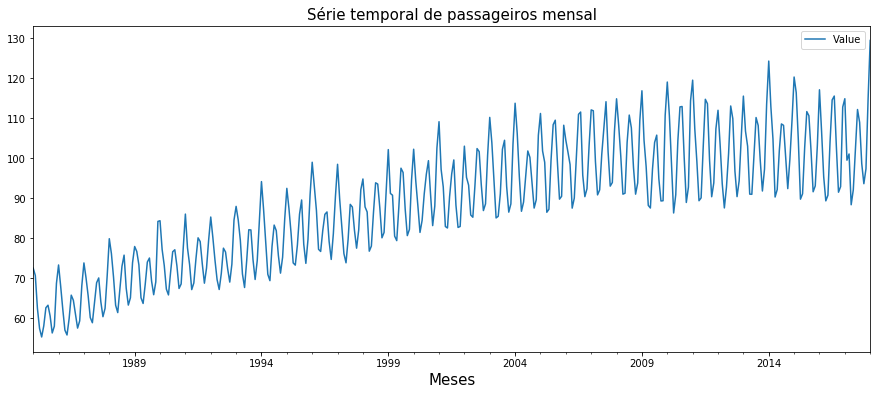

In [6]:
data.plot()
plt.xlabel('Meses',size=15)
plt.ylabel('')
plt.title('Consumo de energia elétrica',size=15)
plt.show()

#Visualizando a base de dados graficamente

#Podemos observar que há tendência e sazonalidade nos dados

# APLICANDO O AUTOARIMA

In [7]:
#Importando o módulo auto_arima
from pmdarima.arima import auto_arima

In [8]:
#vamos atribuir a uma variável o auto arima

#que vai gerar várias modelos arima e os seus respectivos AIC's e BICS

#escolhendo os parâmetros p,d e q:

#o p vai variar entre 1 e 6
#o q vai variar entre 1 e 6
#a sazonalidade será mensal (m=12)
#o P iniciará em 0 e o máximo, por padrão, será 2
#o Q por padrão será 1 e o máximo, por padrão, será 2
#o d será 1 e o máximo, por padrão, será 2
#o D será 1, por padrão já é 1

stepwise=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1782.527, BIC=1802.280, Time=4.212 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=2012.117, BIC=2020.018, Time=0.041 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1942.041, BIC=1957.844, Time=0.767 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1837.289, BIC=1853.091, Time=1.020 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=2010.162, BIC=2014.112, Time=0.033 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=1920.884, BIC=1936.687, Time=1.022 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1783.924, BIC=1807.628, Time=4.453 seconds
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=1783.389, BIC=1807.093, Time=11.200 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 

In [9]:
#Escolhendo o menor AIC
stepwise.aic()

1770.2117855197191

In [10]:
#agora vamos colocar o parâmetro stepwise como False

#serão gerados mais modelos
stepwise=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=2012.117, BIC=2020.018, Time=0.063 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=1864.145, BIC=1875.997, Time=0.488 seconds
Fit ARIMA(0,1,0)x(0,1,2,12) [intercept=True]; AIC=1865.415, BIC=1881.217, Time=4.084 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=1955.902, BIC=1967.754, Time=0.397 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=1865.702, BIC=1881.504, Time=0.890 seconds
Fit ARIMA(0,1,0)x(1,1,2,12) [intercept=True]; AIC=1864.184, BIC=1883.938, Time=3.258 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=1899.730, BIC=1915.533, Time=1.406 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=1855.606, BIC=1875.360, Time=1.807 seconds
Fit ARIMA(0,1,0)x(2,1,2,12) [intercept=True]; AIC=1854.602, BIC=1878.306, Time=4.305 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=1974.343, BIC=1986.195, Time=0.230 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1837.289, BIC=1853.0

Fit ARIMA(3,1,1)x(1,1,0,12) [intercept=True]; AIC=1868.390, BIC=1896.044, Time=4.237 seconds
Fit ARIMA(3,1,2)x(0,1,0,12) [intercept=True]; AIC=1917.822, BIC=1945.476, Time=0.829 seconds
Fit ARIMA(4,1,0)x(0,1,0,12) [intercept=True]; AIC=1957.596, BIC=1981.300, Time=0.478 seconds
Fit ARIMA(4,1,0)x(0,1,1,12) [intercept=True]; AIC=1821.288, BIC=1848.942, Time=1.108 seconds
Fit ARIMA(4,1,0)x(1,1,0,12) [intercept=True]; AIC=1907.257, BIC=1934.911, Time=1.187 seconds
Fit ARIMA(4,1,1)x(0,1,0,12) [intercept=True]; AIC=1912.529, BIC=1940.184, Time=1.769 seconds
Fit ARIMA(5,1,0)x(0,1,0,12) [intercept=True]; AIC=1952.744, BIC=1980.398, Time=0.542 seconds
Total fit time: 349.884 seconds


In [11]:
#dessa vez o AIC foi um pouco menor
stepwise.aic()

1771.2861792622257

# SEPARANDO DADOS DE TREINO E TESTE

Vamos agora usar o autoarima para gerar previsões. Para isso iremos separar os dados em treino e teste. Os dados de treino serão usado para treinar o autoarima e os dados de teste para comparar com as preisões geradas. Vamos separar as 12 últimas observações para dados de teste.

In [12]:
#dados de treino

#vamos colocar os dados de treino de janeiro de 1985 até janeiro de 2017
train=data.loc['1985-01-01':'2017-01-01']

#dados de teste será de fevereiro de 2012 em diante
test=data.loc['2017-01-02':]

In [13]:
#testando o modelo com os dados de treino
stepwise.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [14]:
#gerando previsões para os próximos 12 meses
future_forecast=stepwise.predict(n_periods=12)

In [15]:
#transformando as previsões em um dataset
future_forecast=pd.DataFrame(future_forecast,index=test.index)

In [16]:
#visualizando o dataset de previsões
future_forecast

,0
DATE,
2017-02-01,106.641722
2017-03-01,98.729483
2017-04-01,89.522152
2017-05-01,91.401089
2017-06-01,102.637022
2017-07-01,112.011398
2017-08-01,111.678641
2017-09-01,100.593239
2017-10-01,91.698369


<Figure size 1080x360 with 0 Axes>

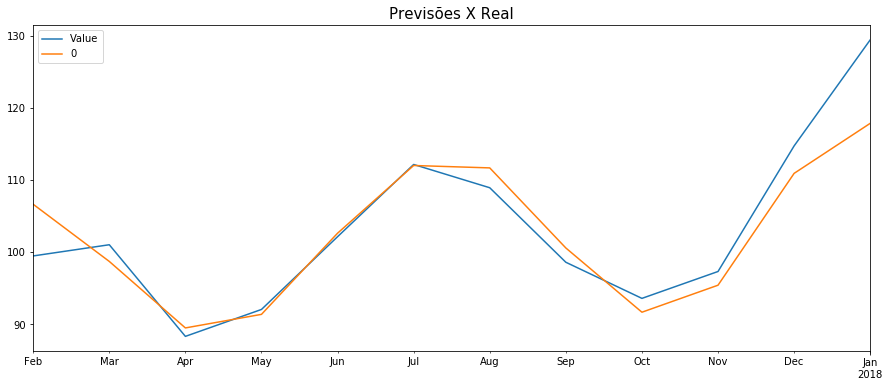

In [17]:
plt.figure(figsize=(15,5))
pd.concat([test,future_forecast],axis=1).plot()
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show()

#Plotando as previsões com os valores reais

#podemos ver que as previsões acompanham bem os valores reais

#é normal que haja alguns erros

<Figure size 1080x360 with 0 Axes>

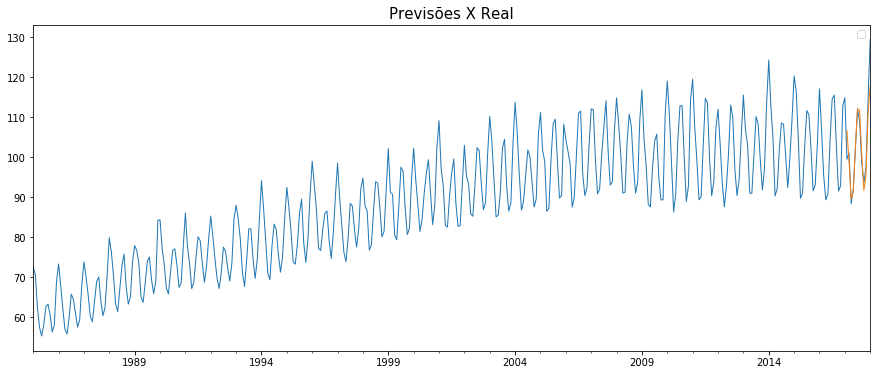

In [38]:
plt.figure(figsize=(15,5))
pd.concat([data,future_forecast],axis=1).plot(linewidth=1)
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

#previsões estão bem adequadas à série temporal.

In [31]:
#importando o módulo do Scikit-learn para obter o erro médio quadrado
from sklearn.metrics import mean_squared_error

In [36]:
#Obtendo o erro médio quadrado
print("RMSE: %.3f" % np.sqrt(mean_squared_error(test, future_forecast)))

RMSE: 4.333


In [48]:
#Calculando os erros
erros=pd.DataFrame(np.array(future_forecast.values.tolist())-np.array(test.values.tolist()))

In [49]:
erros

,0
0,7.151622
1,-2.310117
2,1.169152
3,-0.679411
4,0.483822
5,-0.142402
6,2.747441
7,1.977839
8,-1.915331
9,-1.897753
